### CNN



In [3]:
import tensorflow as tf
from tensorflow import  keras
from tensorflow.keras import layers

# ชี้ไปที่โฟลเดอร์ "Images" ที่เราเพิ่งถ่ายรูปเก็บไว้
data_dir = 'Images'

# Load the dataset
train_ds = keras.utils.image_dataset_from_directory(
    # directory='D:/MLpython310/ML-Image/Dataset/train/',
    directory=data_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=16,
    image_size=(224, 224))
test_ds = keras.utils.image_dataset_from_directory(
    # directory='D:/MLpython310/ML-Image/Dataset/test/',
    directory=data_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=16,
    image_size=(224, 224))

Found 13 files belonging to 2 classes.
Found 13 files belonging to 2 classes.


In [4]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  #  have 2 classes
])
model.summary()

c:\Users\piyac\Downloads\WS-10-06-2025-AI-SIT-main\cnn-ws-venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,218 (42.61 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_ds, epochs=20, validation_data=test_ds)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4615 - loss: 17.6004 - val_accuracy: 0.5385 - val_loss: 2481.7222
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.5385 - loss: 2481.7224 - val_accuracy: 0.5385 - val_loss: 891.8409
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.5385 - loss: 891.8408 - val_accuracy: 0.5385 - val_loss: 87.8615
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.5385 - loss: 87.8615 - val_accuracy: 0.4615 - val_loss: 50.8305
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.4615 - loss: 50.8305 - val_accuracy: 0.4615 - val_loss: 16.8764
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.4615 - loss: 16.8764 - val_accuracy: 0.5385 - val_loss: 12.2732
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.5385 - loss: 12.2732 - val_accuracy: 0.8462 - val_loss: 0.3189
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.8462 - loss: 0.3189 - val_accuracy: 1.

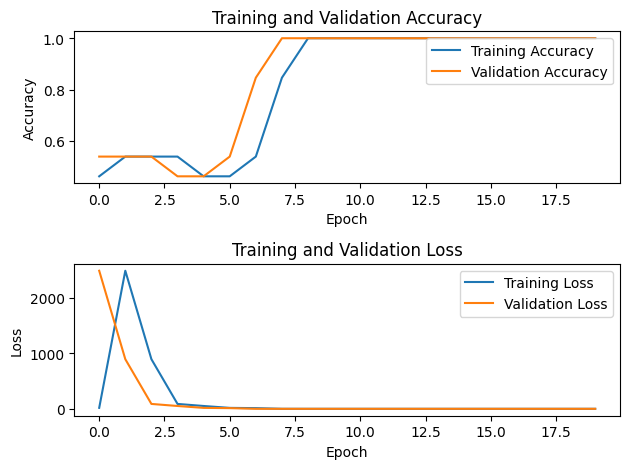

In [6]:
import matplotlib.pyplot as plt
# Plot training history for accuracy
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training history for loss
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## CNN pre-trained

1. เตรียมข้อมูล train และ test ตามโฟลเดอร์ ที่เก็บข้อมูลไว้


In [7]:
import tensorflow as tf
from tensorflow import  keras
from tensorflow.keras import layers

data_dir = 'Images'
train_ds = keras.utils.image_dataset_from_directory(
    # directory='D:/MLpython310/ML-Image/Dataset/train/',
    directory=data_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224))
test_ds = keras.utils.image_dataset_from_directory(
    # directory='D:/MLpython310/ML-Image/Dataset/test/',
    directory=data_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224))

Found 13 files belonging to 2 classes.
Found 13 files belonging to 2 classes.


2. แสดงชื่อคลาส


In [8]:
class_names = train_ds.class_names
print(class_names)

['ClassA', 'ClassB']


In [9]:
import json

with open("class_names.json", "w") as f:
    json.dump(class_names, f)


3. สร้างชั้น CNN  โดยใช้ package VGG16 กำหนด ดังนี้ 
- ไม่เอาชั้น fully connected nn โดยกำหนด include_top=False
- weights='imagenet'
- input_shape=(224,224,3)





In [10]:
#Exam2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
import tensorflow as tf
from tensorflow import  keras
from tensorflow.keras import layers
from tensorflow.keras.applications.vgg16 import VGG16  #https://keras.io/api/applications/vgg/
import numpy as np

base = VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))
base.trainable = False

model = keras.Sequential()
model.add(base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary() 

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,154,050 (80.70 MB)

 Trainable params: 6,439,362 (24.56 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

4. แสดงโครงสร้างของ base model ในข้อ 3



In [11]:
base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

5. กำหนดให้ไม่ต้องมีการปรับค่า weight ของ base model


In [12]:
base.trainable = False

6. กำหนดโครงสร้างของโมเดล สำหรับสอนข้อมูลภาพที่เราสร้างไว้ 


In [13]:
model = keras.Sequential()
model.add(base)
model.add(layers.Flatten())
model.add(layers.Dense(2, activation='softmax'))
model.summary() 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

7. กำหนดรูปแบบ การเรียนรู้ 
- loss='categorical_crossentropy' 
- optimizer='adam'
- metrics=['accuracy']


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

8. ให้โมเดลเรียนรู้จากข้อมูลสอน จำนวน 10 รอบ และกำหนด validation_data=test_ds


In [15]:
# model.fit(train_ds, epochs=10, validation_data=test_ds)

# Train the model
history = model.fit(train_ds, epochs=20, validation_data=test_ds)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6154 - loss: 7.0549 - val_accuracy: 1.0000 - val_loss: 5.4941e-04
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 5.4941e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - 

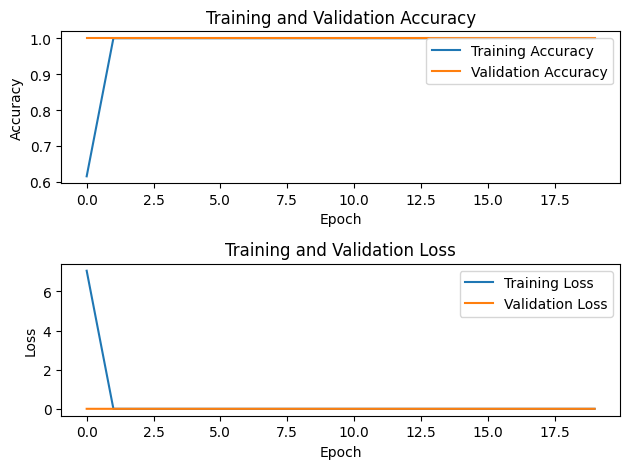

In [16]:
import matplotlib.pyplot as plt
# Plot training history for accuracy
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training history for loss
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,865,224 (56.71 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 100,358 (392.03 KB)

9. บันทึก model ชื่อ 6xxxxxxx_model.h5


In [ ]:
# model.save('6xxxxxxx_model.h5')
model.save("my_model.keras")  # or .h5


10. อ่านภาพ และทำนาย ภาพ ว่าอยู่คลาสใด


In [20]:
# from tensorflow.keras.models import load_model

# model = load_model("my_model.keras")  # or "my_model.h5"
# 1. คอมไพล์ (Compile) - ตั้งค่าการเรียนรู้
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 2. เทรน (Train) - เริ่มสอน AI (ขั้นตอนนี้อาจใช้เวลาสักพัก)
# เปลี่ยน epochs=5 เป็นเลขอื่นได้ถ้าอยากให้เก่งขึ้น (เช่น 10, 20)
history = model.fit(train_ds, validation_data=test_ds, epochs=5)

# 3. บันทึก (Save) - สร้างไฟล์ my_model.keras
model.save("my_model.keras")

print("เย้! บันทึกโมเดลเสร็จแล้ว ตอนนี้คุณมีไฟล์ my_model.keras แล้ว")

Epoch 1/5


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
เย้! บันทึกโมเดลเสร็จแล้ว ตอนนี้คุณมีไฟล์ my_model.keras แล้ว


In [19]:
import json
with open("class_names.json", "r") as f:
    class_names = json.load(f)


In [21]:
import cv2
import tensorflow as tf
import numpy as np

im = cv2.imread('D:/MLpython310/ML-Image/Dataset/test/hand-zero/20210711-203645.jpg')
imrz = cv2.resize(im,(224,224))
im_arr = tf.keras.utils.img_to_array(imrz)
im_arr = np.array([im_arr])  # Convert single image to a batch.
predictions = model.predict(im_arr)
str_class = class_names[predictions.argmax()]
print('Class: ', str_class)

image = cv2.putText(im,str_class,(50, 70), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 2, cv2.LINE_AA)

cv2.imshow("image", image)
cv2.waitKey()



error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import tensorflow as tf

cap = cv2.VideoCapture(0)  # Use 0 for webcam

while True:
    ret, frame = cap.read()
    if not ret:
        break

    img = cv2.resize(frame, (224, 224))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    predictions = model.predict(img_array)
    class_index = np.argmax(predictions)
    confidence = predictions[0][class_index]
    label = f"{class_names[class_index]}: {confidence:.2f}"

    cv2.putText(frame, label, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 2)
    cv2.imshow("Webcam Prediction", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
